In [1]:
from utils import *

## Exercice 1 - Fichier `mouse.txt`

La détection d’anomalies est une tâche de l’apprentissage automatique qui consiste à déceler dans les données, les individus ayant un comportement différent des autres instances de la base dites normales. Dans cet exercice, nous allons nous pencher sur l'implémentation et le test de différents algorithmes de détection d'outliers via la librairie scikit-learn. 

Le fichier étudié contient 500 instances décrites par deux variables x1 et x2, représentant des points de la tête de Mickey Mouse. Les 10 dernières instances du fichier sont des outliers.

In [2]:
# 1. Charger les données
data = load_data('data/mouse.txt')

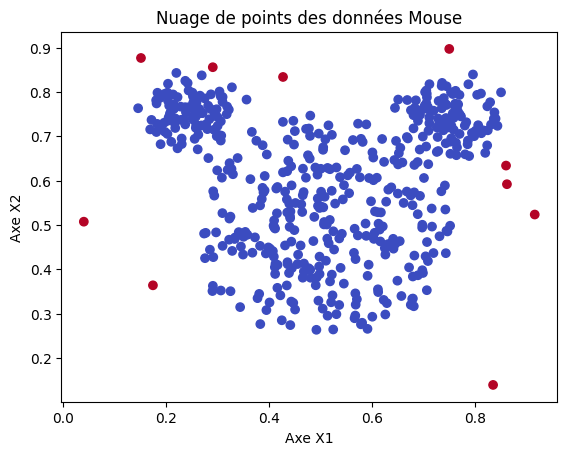

In [3]:
# 2. Visualiser les données
plot_data(data, title="Nuage de points des données Mouse")

### Premier algorithme : Isolation Forest

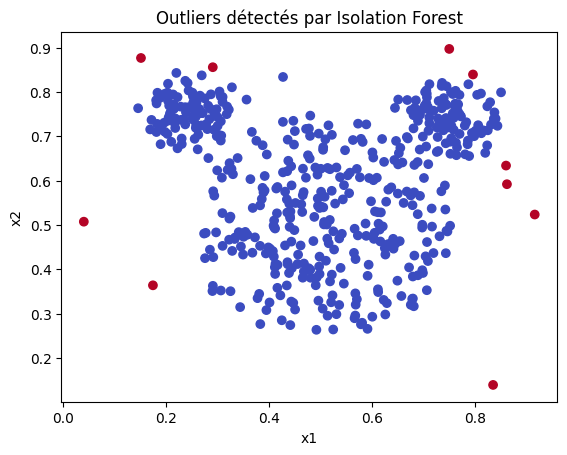

In [4]:
# 3. Détecter les outliers avec Isolation Forest
data, iso_scores = detect_outliers_isolation_forest(data)
plot_outliers(data, method='iso')

### Second algorithme : Local Outlier Factor

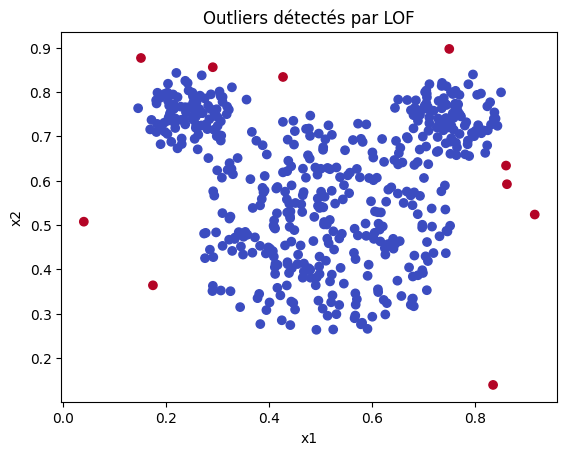

In [5]:
# 4. Détecter les outliers avec LOF
data, lof_scores = detect_outliers_lof(data)
plot_outliers(data, method='lof')

### Comparaison des outliers pour les 2 algorithmes

On voit dans le tableau suivant que le LOF détecte l'ensemble des true_outliers tandis que ISO se trompe sur un outlier. Le contamination_rate est fixé au départ pour les 2 algorithmes à 2% qui correspond au nombre d'outliers comptés réellement dans le dataset. ISO détecte un autre datapoint comme un outlier.

In [6]:
data.iloc[-10:]

,x1,x2,true_outlier,iso_outlier,lof_outlier
490,0.290950,0.855767,-1,-1,-1
491,0.750068,0.897028,-1,-1,-1
492,0.040555,0.507240,-1,-1,-1
493,0.835162,0.138940,-1,-1,-1
494,0.174740,0.363686,-1,-1,-1
495,0.151506,0.876586,-1,-1,-1
496,0.860308,0.633833,-1,-1,-1
497,0.862083,0.591805,-1,-1,-1
498,0.916030,0.523391,-1,-1,-1
499,0.427325,0.833767,-1,1,-1


La suite de l'étude porte sur les scores de chaque élément du dataset. L'objectif est d'utiliser des algorithmes de clustering sur les scores afin d'identifier automatiquement le meilleur seuil pour détecter les outliers.

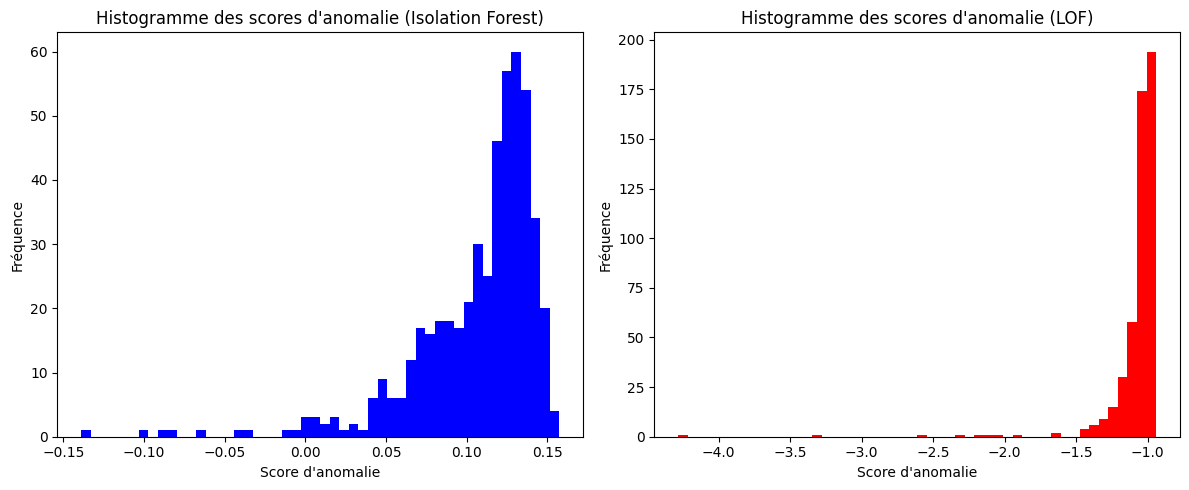

In [7]:
# 5. Afficher les histogrammes des scores d'anomalie
plot_anomaly_scores(iso_scores, lof_scores)

In [8]:
# Ajuster le seuil avec K-Means pour Isolation Forest
iso_kmeans_outliers, iso_kmeans_threshold = adjust_threshold_with_kmeans(data, iso_scores, k=5)

# Ajuster le seuil avec IQR pour Isolation Forest
iso_iqr_outliers, iso_iqr_threshold = adjust_threshold_with_iqr(data, iso_scores)

# Ajuster le seuil avec K-Means pour LOF
lof_kmeans_outliers, lof_kmeans_threshold = adjust_threshold_with_kmeans(data, lof_scores)

# Ajuster le seuil avec IQR pour LOF
lof_iqr_outliers, lof_iqr_threshold = adjust_threshold_with_iqr(data, lof_scores)

Ci-dessous sont affichés les résultats des K-Means et IQR. Ici, le contamination_rate n'est pas fixé mais l'algorithme trouve un seuil pour détection de outliers. On voit graphiquement que les outliers sont détectés mais l'algorithme en détecte trop la plupart du temps. Pour K-Means, le nombre de cluster a été fixé à 2 dans un premier temps. La combinaison LOF + K-Means se rapproche le plus du dataset en détectant uniquement 8 des 10 outliers de départ.

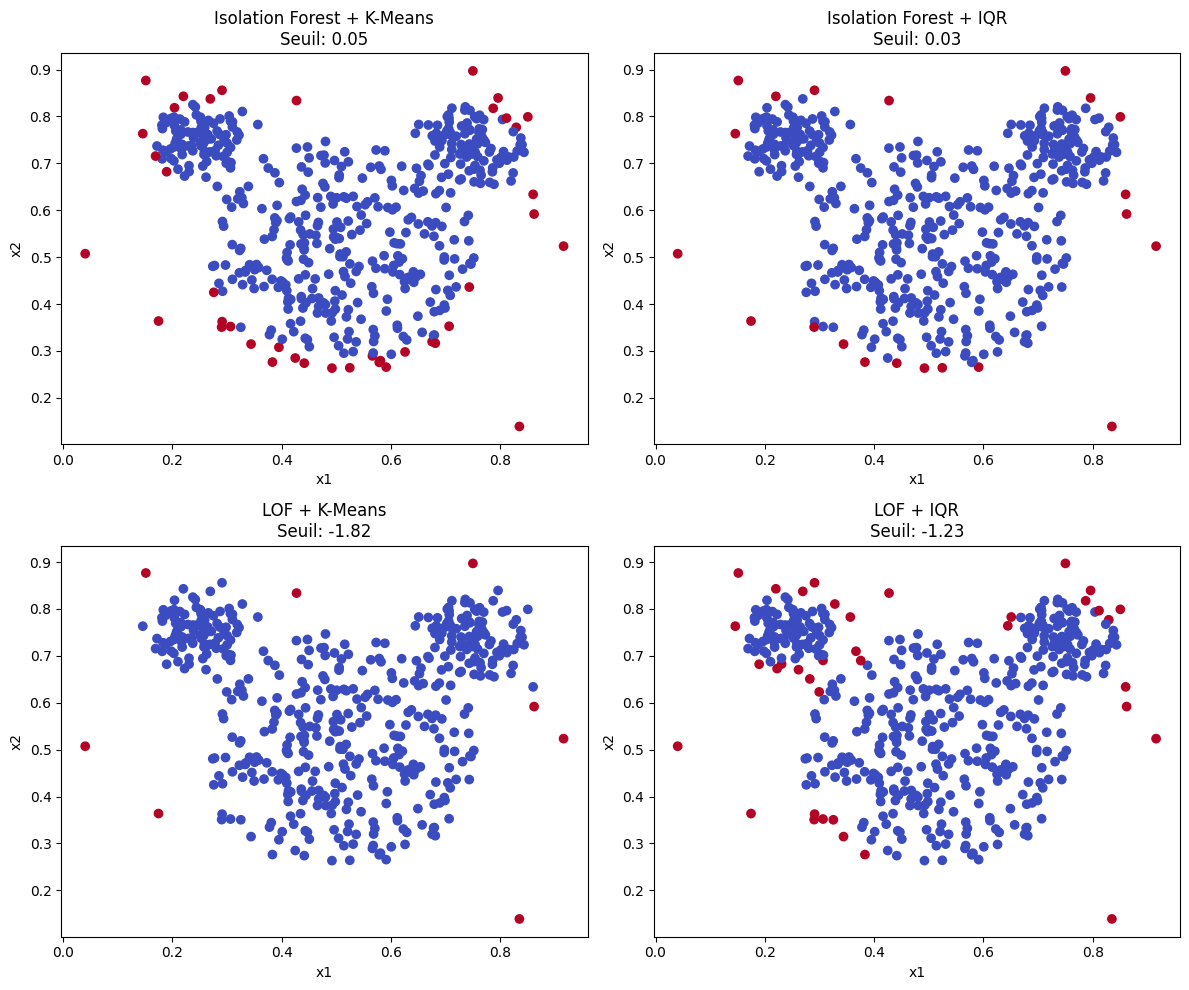

In [9]:
# Visualiser les résultats
plot_unsupervised_results(data, iso_kmeans_outliers, iso_kmeans_threshold, iso_iqr_outliers, iso_iqr_threshold,
             lof_kmeans_outliers, lof_kmeans_threshold, lof_iqr_outliers, lof_iqr_threshold)

Ce que l'on peut faire pour améliorer la précision de l'algorithme K-Means est d'augmenter le nombre de clusters et analyser unqiuement le dernier cluster sur les valeurs des scores correspondant aux outliers. On essaie avec k = 5.

In [10]:
# Ajuster le seuil avec K-Means pour Isolation Forest
iso_kmeans_outliers, iso_kmeans_threshold = adjust_threshold_with_kmeans(data, iso_scores, k = 5)

# Ajuster le seuil avec K-Means pour LOF
lof_kmeans_outliers, lof_kmeans_threshold = adjust_threshold_with_kmeans(data, lof_scores, k = 5)

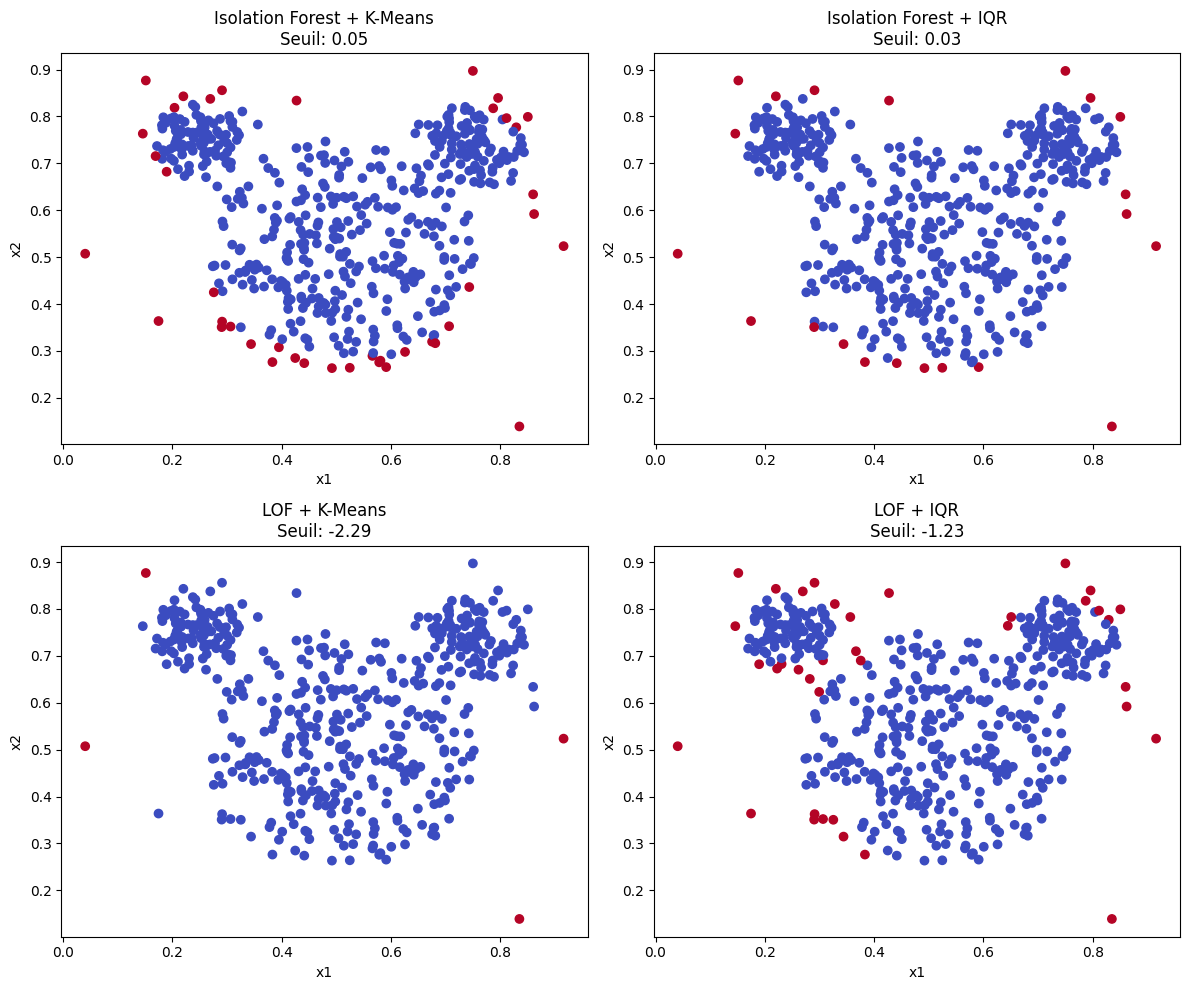

In [11]:
# Visualiser les résultats
plot_unsupervised_results(data, iso_kmeans_outliers, iso_kmeans_threshold, iso_iqr_outliers, iso_iqr_threshold,
             lof_kmeans_outliers, lof_kmeans_threshold, lof_iqr_outliers, lof_iqr_threshold)

On voit que beaucoup moins de data points sont détectés en tant que outliers pour IF et LOF. Il pourrait être intéressant de trouver le nombre de clusters optimals et donc le seuil optimal pour IF et pour LOF respectivement afin de ne détecter que le nombre exacte d'outliers dans le dataset de départ.

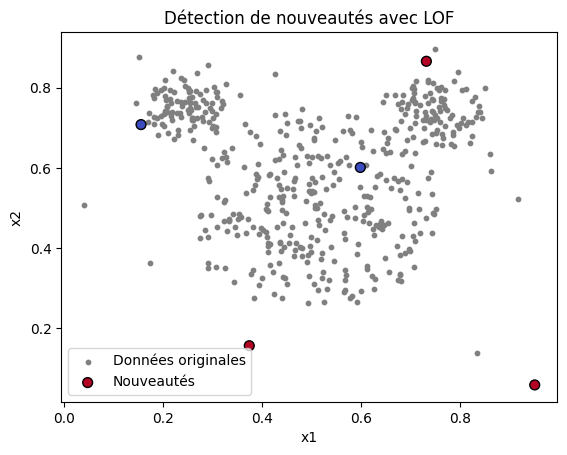

In [12]:
# 8. Détecter des nouveautés avec LOF

new_data = create_new_data(5)
novelty_scores = detect_novelty_lof(data, new_data)
plot_novelty_detection(data, new_data, novelty_scores)

Nous nous sommes penchés sur la détection de nouveautés en utilisant la méthode LOF. Pour cela, on génère 5 points aléatoirement dans l'intervalle [0, 1]. Visuelellement, on analyse que 3 des 5 points sont détectés comme étant des outliers. Si l'on regarde, ces 3 points se situent soit aux extrémités de la figure, soit en dehors de celle-ci. Cela montre une bonne détection des nouveautés sur ces 5 nouveaux points.

## Exercice 2 - Partie 1 - Fichier `creditcard.csv`

In [13]:
# 1. Charger les données
data = load_data('data/creditcard.csv')

In [14]:
# Prétraiter les données
X_scaled, y = preprocess_data(data)

# Séparer les données
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

print("Comptage des classes dans y_train :")
print(Counter(y_train))


Comptage des classes dans y_train :
Counter({0: 227451, 1: 394})


### Evaluation des modèles sans optimisation du seuil

EasyEnsemble Results:
Confusion Matrix:
[[54870  1994]
 [    8    90]]

F1-score: 0.0825
ROC AUC: 0.9750

Balanced Accuracy: 0.9417
Average Precision: 0.7487



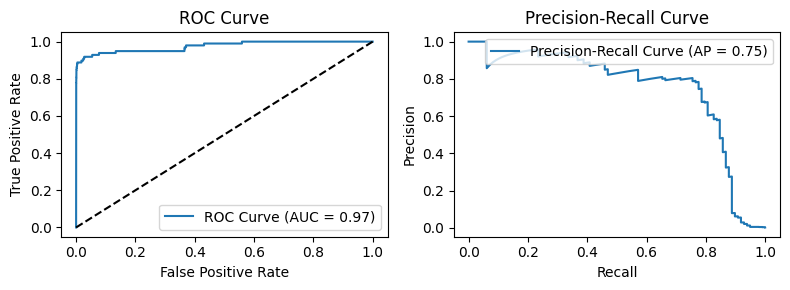

IsolationForest Results:
Confusion Matrix:
[[54811  2053]
 [   16    82]]

F1-score: 0.0734
ROC AUC: 0.9528

Balanced Accuracy: 0.9003
Average Precision: 0.1714



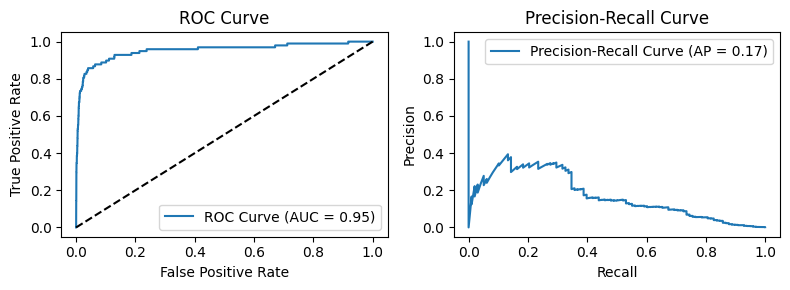

LOF Results:
Confusion Matrix:
[[52595  4269]
 [   83    15]]

F1-score: 0.0068
ROC AUC: 0.4854

Balanced Accuracy: 0.5390
Average Precision: 0.0021



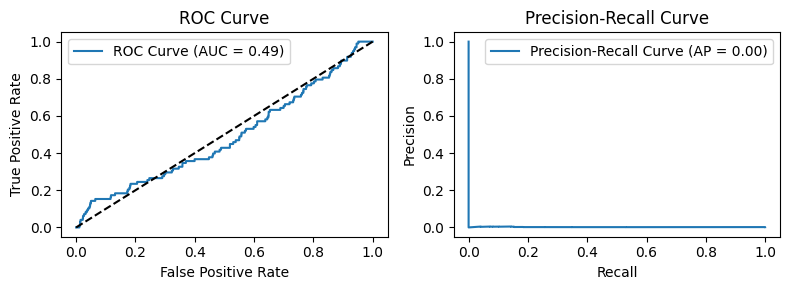

XGBoost Results:
Confusion Matrix:
[[56853    11]
 [   15    83]]

F1-score: 0.8646
ROC AUC: 0.9691

Balanced Accuracy: 0.9234
Average Precision: 0.8812



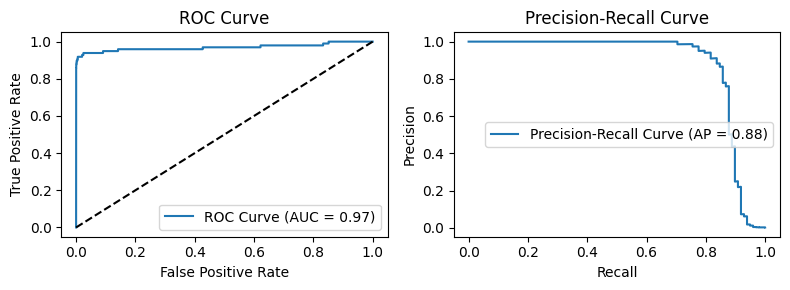

RandomForest Results:
Confusion Matrix:
[[56861     3]
 [   24    74]]

F1-score: 0.8457
ROC AUC: 0.9580

Balanced Accuracy: 0.8775
Average Precision: 0.8483



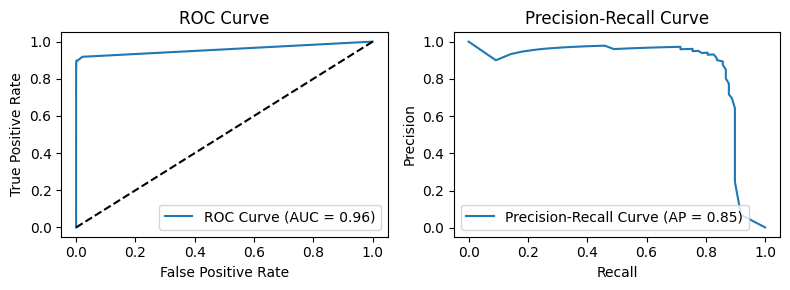

TomekLinks Results:
Confusion Matrix:
[[56855     9]
 [   23    75]]

F1-score: 0.8242
ROC AUC: 0.9431

Balanced Accuracy: 0.8826
Average Precision: 0.7885



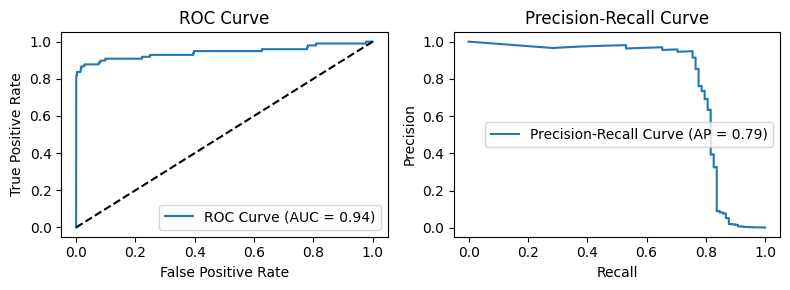

SMOTE Results:
Confusion Matrix:
[[56828    36]
 [   14    84]]

F1-score: 0.7706
ROC AUC: 0.9751

Balanced Accuracy: 0.9283
Average Precision: 0.8659



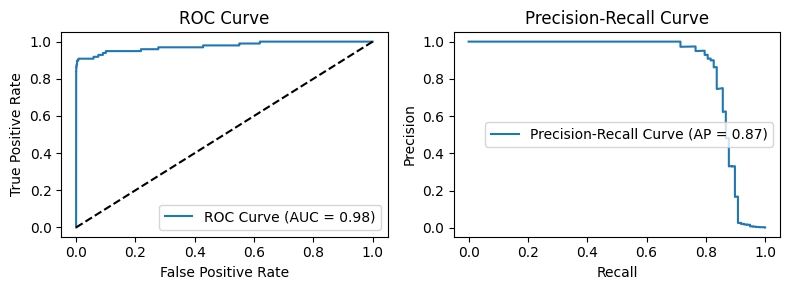

In [15]:
# Définir les modèles à tester
models = {
    'EasyEnsemble': train_easy_ensemble(X_train, y_train),
    'IsolationForest': train_isolation_forest(X_train),
    'LOF': train_lof(X_train),
    'XGBoost': train_xgboost(X_train, y_train),
    'RandomForest': train_random_forest(X_train, y_train),
    'TomekLinks': train_with_tomek_links(X_train, y_train),
    'SMOTE': train_with_smote(X_train, y_train)
}


# Evaluation des modèles sans optimisation du seuil
result_evaluation(models, X_test, y_test, optimize_threshold=False)

### Evaluation des modèles avec optimisation du seuil

EasyEnsemble Results:
Confusion Matrix:
[[56843    21]
 [   22    76]]

F1-score: 0.7795
ROC AUC: 0.9750

Balanced Accuracy: 0.8876
Average Precision: 0.7487



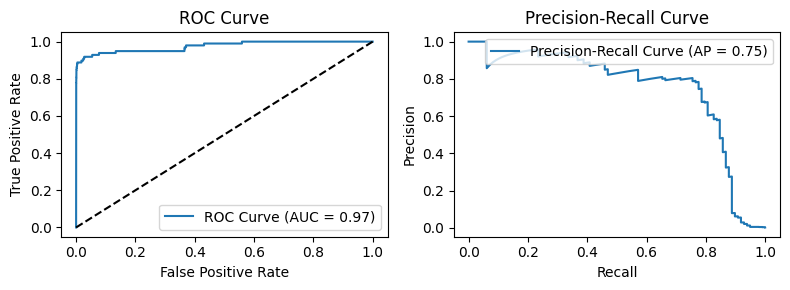

IsolationForest Results:
Confusion Matrix:
[[56803    61]
 [   67    31]]

F1-score: 0.3263
ROC AUC: 0.9528

Balanced Accuracy: 0.6576
Average Precision: 0.1714



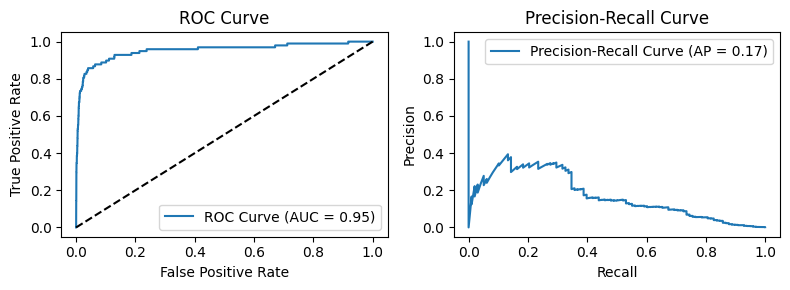

LOF Results:
Confusion Matrix:
[[54019  2845]
 [   84    14]]

F1-score: 0.0095
ROC AUC: 0.4854

Balanced Accuracy: 0.5464
Average Precision: 0.0021



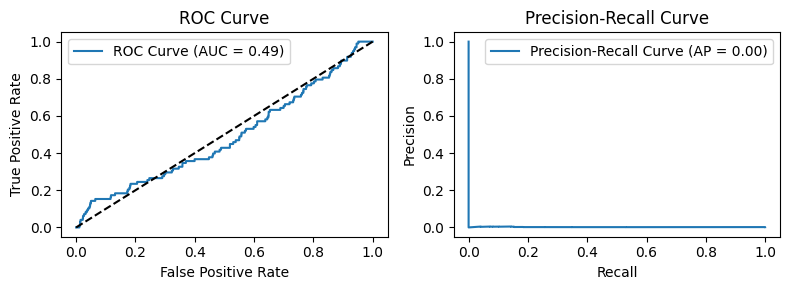

XGBoost Results:
Confusion Matrix:
[[56859     5]
 [   18    80]]

F1-score: 0.8743
ROC AUC: 0.9691

Balanced Accuracy: 0.9081
Average Precision: 0.8812



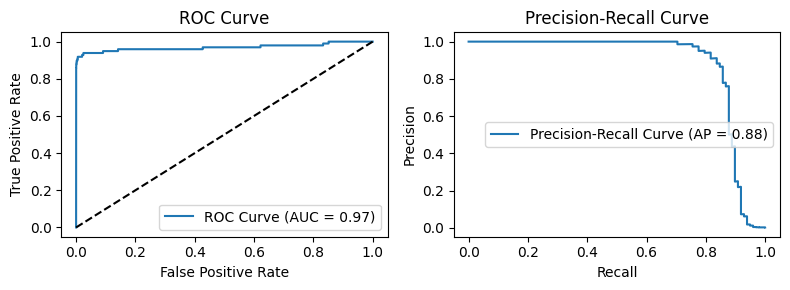

RandomForest Results:
Confusion Matrix:
[[56858     6]
 [   17    81]]

F1-score: 0.8757
ROC AUC: 0.9580

Balanced Accuracy: 0.9132
Average Precision: 0.8483



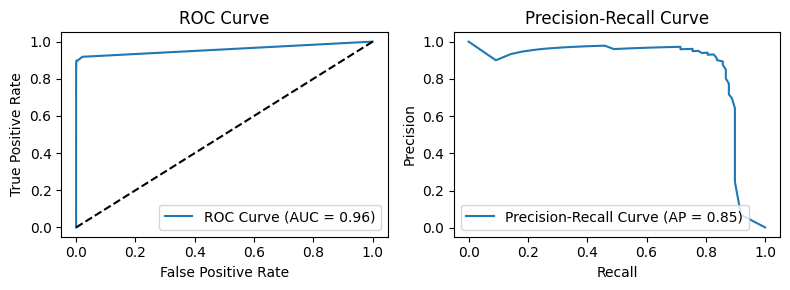

TomekLinks Results:
Confusion Matrix:
[[56860     4]
 [   24    74]]

F1-score: 0.8409
ROC AUC: 0.9431

Balanced Accuracy: 0.8775
Average Precision: 0.7885



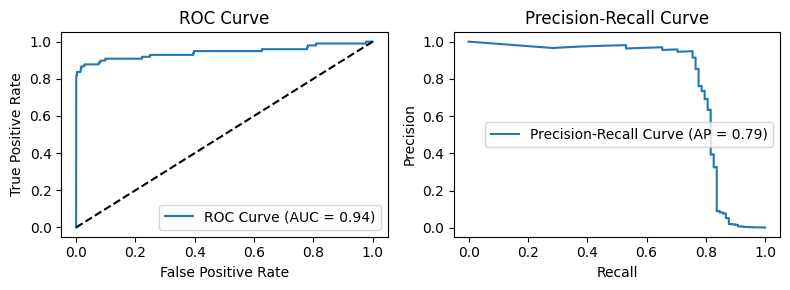

SMOTE Results:
Confusion Matrix:
[[56860     4]
 [   20    78]]

F1-score: 0.8667
ROC AUC: 0.9751

Balanced Accuracy: 0.8979
Average Precision: 0.8659



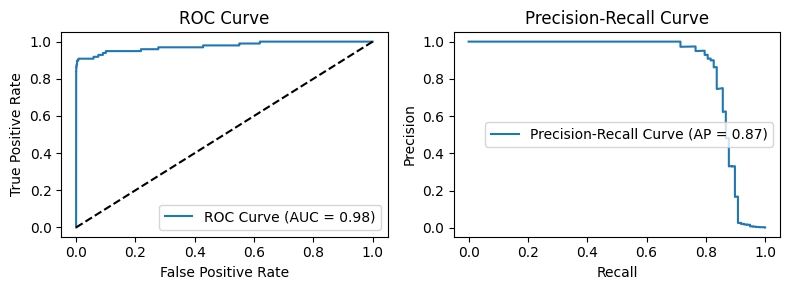

In [16]:
# Evaluation des modèles avec optimisation du seuil
result_evaluation(models, X_test, y_test, optimize_threshold=True)

### Optimisation des hyperparamètres de XGBoost

XGBoost_Optimized_without_threshold_selection Results:
Confusion Matrix:
[[56854    10]
 [   15    83]]

F1-score: 0.8691
ROC AUC: 0.9787

Balanced Accuracy: 0.9234
Average Precision: 0.8751



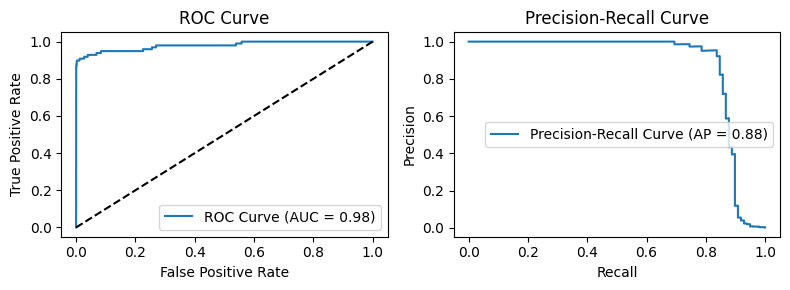

XGBoost_Optimized_with_threshold_selection Results:
Confusion Matrix:
[[56860     4]
 [   16    82]]

F1-score: 0.8913
ROC AUC: 0.9787

Balanced Accuracy: 0.9183
Average Precision: 0.8751



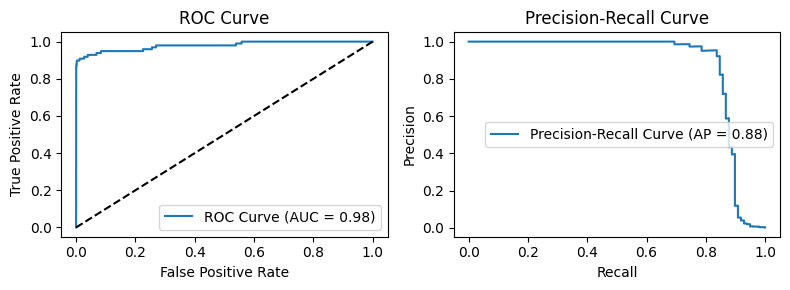

In [ ]:
# Optimisation des hyperparamètres pour RandomForest (meilleur modèle)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

rfmax, param = optimize_hyperparameters(models['RandomForest'], param_grid, X_train, y_train)
models.update({'RandomForest_Optimized': rfmax})

result_evaluation({'RandomForest_Optimized_without_threshold_selection': rfmax}, X_train, X_test, y_train, y_test)
result_evaluation({'RandomForest_Optimized_with_threshold_selection': rfmax}, X_train, X_test, y_train, y_test, optimize_threshold=True)

### Résultats finaux sur Cross-Validation 5 Folds

Les algorithmes IsolationForest et LOF, qui sont non supervisés, sont très peu performants ici par rapport à l'exercice 1.

In [18]:
# Cross validation sur les modèles
result_cross_val(models, X_scaled, y, optimize_threshold=True)


EasyEnsemble Cross-Validation Results:
F1-score: 0.7826
ROC AUC: 0.9772
Average Precision: 0.7480
Balanced Accuracy: 0.8726

XGBoost Cross-Validation Results:
F1-score: 0.8291
ROC AUC: 0.9795
Average Precision: 0.8047
Balanced Accuracy: 0.9001

RandomForest Cross-Validation Results:
F1-score: 0.8341
ROC AUC: 0.9441
Average Precision: 0.7584
Balanced Accuracy: 0.9012

TomekLinks Cross-Validation Results:
F1-score: 0.7730
ROC AUC: 0.9322
Average Precision: 0.7373
Balanced Accuracy: 0.8544

SMOTE Cross-Validation Results:
F1-score: 0.7730
ROC AUC: 0.9322
Average Precision: 0.7373
Balanced Accuracy: 0.8544

XGBoost_Optimized Cross-Validation Results:
F1-score: 0.8300
ROC AUC: 0.9789
Average Precision: 0.8070
Balanced Accuracy: 0.8981



## Exercice 2 - Partie 2 - Fichier `KDDCup99.csv`

In [19]:
data = load_data('data/KDDCup99.csv')

In [20]:
# Prétraiter les données
X_scaled, y = preprocess_data(data)

# Séparer les données
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

print("Comptage des classes dans y_train :")
print(Counter(y_train))


Comptage des classes dans y_train :
Counter({0: 77821, 1: 24})


### Evaluation des modèles sans optimisation du seuil

EasyEnsemble Results:
Confusion Matrix:
[[19024   432]
 [    0     6]]

F1-score: 0.0270
ROC AUC: 1.0000

Balanced Accuracy: 0.9889
Average Precision: 1.0000



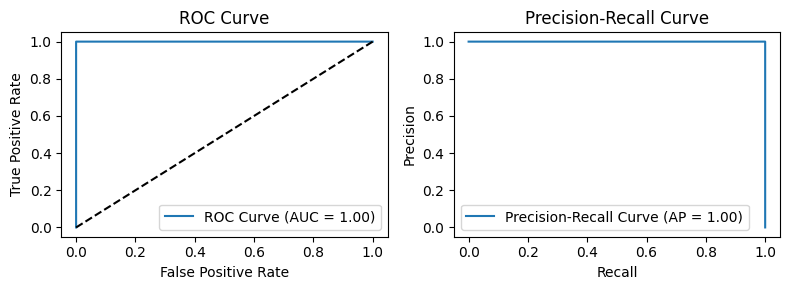

IsolationForest Results:
Confusion Matrix:
[[18279  1177]
 [    5     1]]

F1-score: 0.0017
ROC AUC: 0.8666

Balanced Accuracy: 0.5531
Average Precision: 0.0014



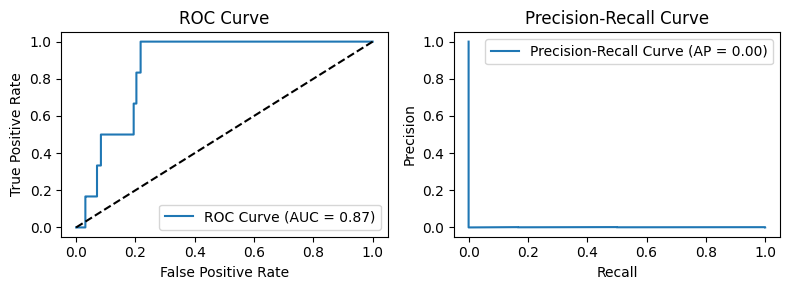

LOF Results:
Confusion Matrix:
[[17533  1923]
 [    5     1]]

F1-score: 0.0010
ROC AUC: 0.5394

Balanced Accuracy: 0.5339
Average Precision: 0.0009



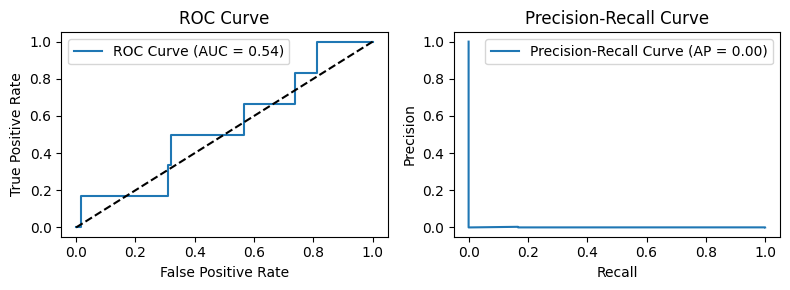

XGBoost Results:
Confusion Matrix:
[[19454     2]
 [    0     6]]

F1-score: 0.8571
ROC AUC: 1.0000

Balanced Accuracy: 0.9999
Average Precision: 0.9583



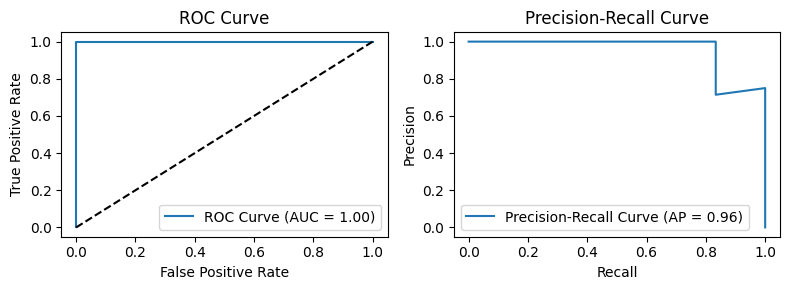

RandomForest Results:
Confusion Matrix:
[[19456     0]
 [    1     5]]

F1-score: 0.9091
ROC AUC: 1.0000

Balanced Accuracy: 0.9167
Average Precision: 1.0000



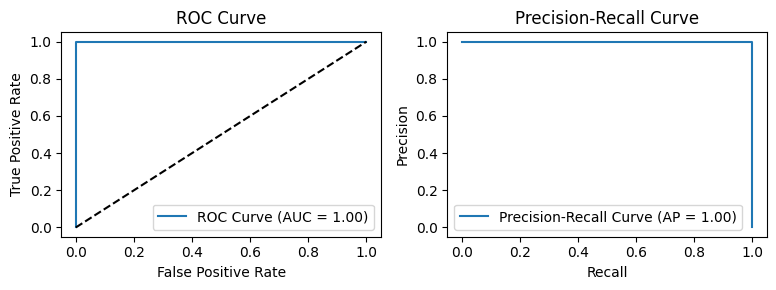

TomekLinks Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]

F1-score: 1.0000
ROC AUC: 1.0000

Balanced Accuracy: 1.0000
Average Precision: 1.0000



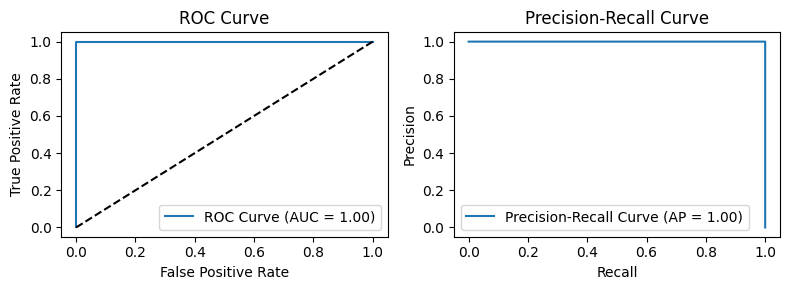

SMOTE Results:
Confusion Matrix:
[[19454     2]
 [    0     6]]

F1-score: 0.8571
ROC AUC: 1.0000

Balanced Accuracy: 0.9999
Average Precision: 0.9107



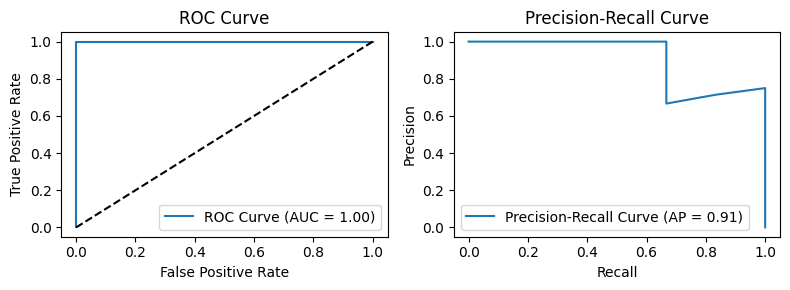

In [21]:
# Définir les modèles à tester
models = {
    'EasyEnsemble': train_easy_ensemble(X_train, y_train),
    'IsolationForest': train_isolation_forest(X_train),
    'LOF': train_lof(X_train),
    'XGBoost': train_xgboost(X_train, y_train),
    'RandomForest': train_random_forest(X_train, y_train),
    'TomekLinks': train_with_tomek_links(X_train, y_train),
    'SMOTE': train_with_smote(X_train, y_train)
}

# Evaluation des modèles sans optimisation du seuil
result_evaluation(models, X_test, y_test, optimize_threshold=False)

### Evaluation des modèles avec optimisation du seuil

EasyEnsemble Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]

F1-score: 1.0000
ROC AUC: 1.0000

Balanced Accuracy: 1.0000
Average Precision: 1.0000



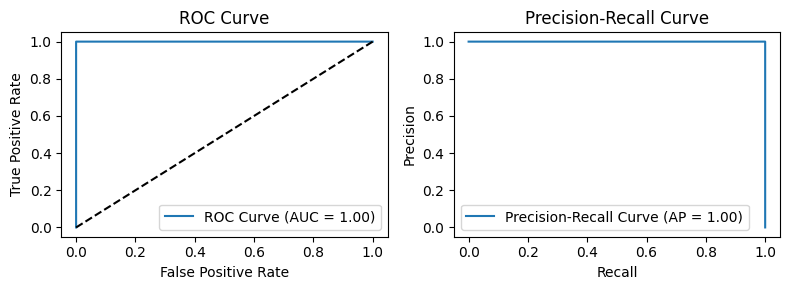

IsolationForest Results:
Confusion Matrix:
[[17829  1627]
 [    3     3]]

F1-score: 0.0037
ROC AUC: 0.8666

Balanced Accuracy: 0.7082
Average Precision: 0.0014



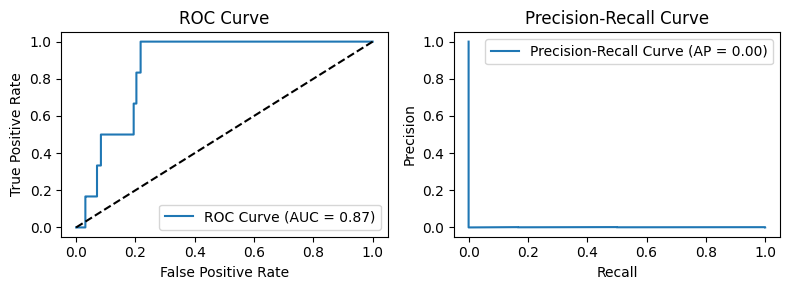

LOF Results:
Confusion Matrix:
[[19157   299]
 [    5     1]]

F1-score: 0.0065
ROC AUC: 0.5394

Balanced Accuracy: 0.5756
Average Precision: 0.0009



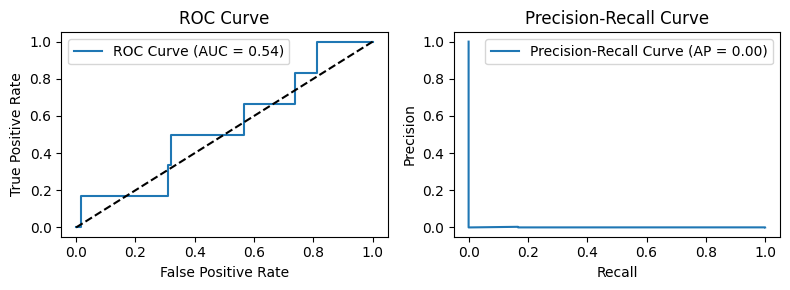

XGBoost Results:
Confusion Matrix:
[[19456     0]
 [    1     5]]

F1-score: 0.9091
ROC AUC: 1.0000

Balanced Accuracy: 0.9167
Average Precision: 0.9583



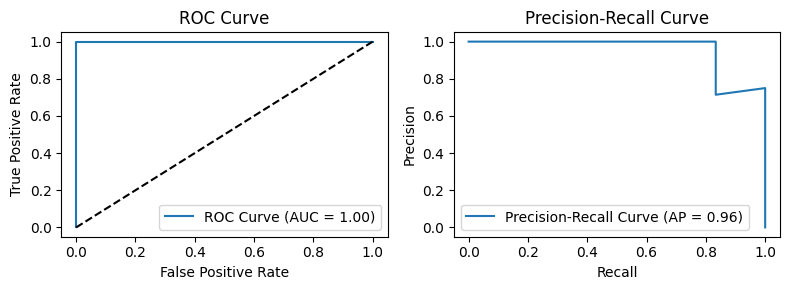

RandomForest Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]

F1-score: 1.0000
ROC AUC: 1.0000

Balanced Accuracy: 1.0000
Average Precision: 1.0000



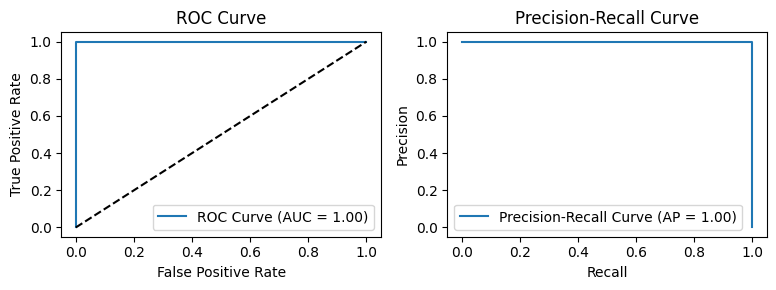

TomekLinks Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]

F1-score: 1.0000
ROC AUC: 1.0000

Balanced Accuracy: 1.0000
Average Precision: 1.0000



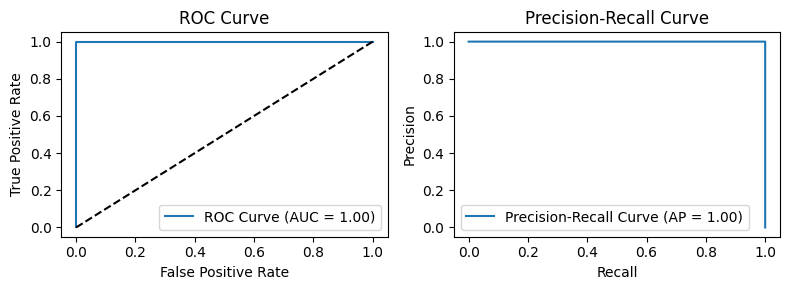

SMOTE Results:
Confusion Matrix:
[[19454     2]
 [    0     6]]

F1-score: 0.8571
ROC AUC: 1.0000

Balanced Accuracy: 0.9999
Average Precision: 0.9107



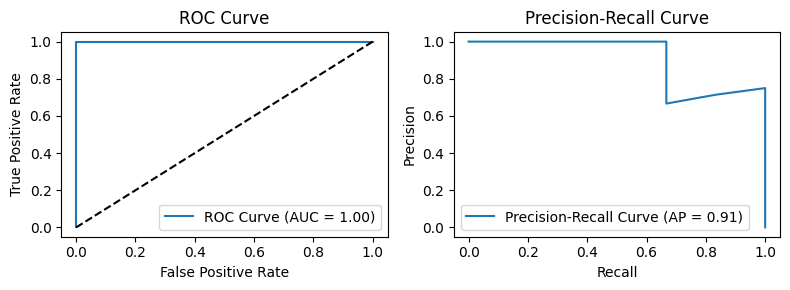

In [22]:
# Evaluation des modèles avec optimisation du seuil
result_evaluation(models, X_test, y_test, optimize_threshold=True)

On remarque ici encore que LOF et Isolation forest, qui sont des algorithmes non-supervisés, sont beaucoup moins performants ici.

### Optimisation des hyperparamètres sur XGBoost

XGBoost_Optimized_without_threshold_selection Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]

F1-score: 1.0000
ROC AUC: 1.0000

Balanced Accuracy: 1.0000
Average Precision: 1.0000



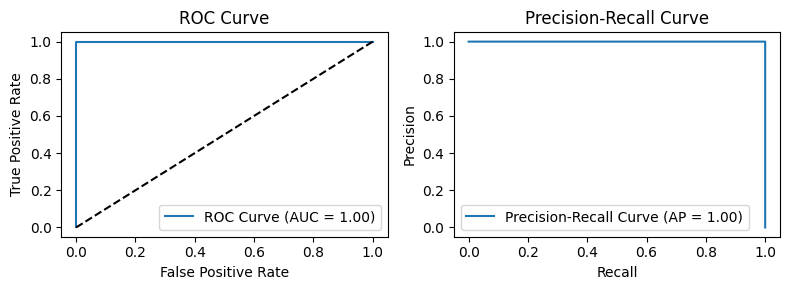

XGBoost_Optimized_with_threshold_selection Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]

F1-score: 1.0000
ROC AUC: 1.0000

Balanced Accuracy: 1.0000
Average Precision: 1.0000



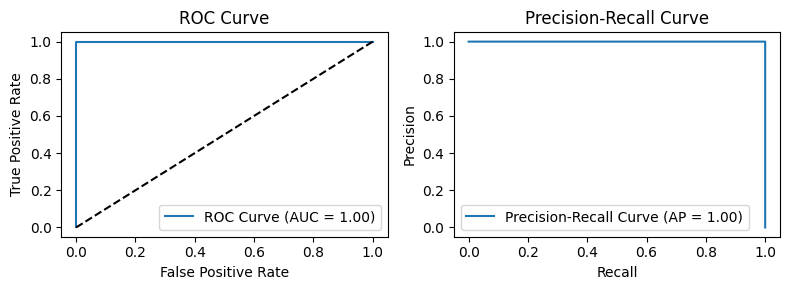

In [ ]:
# Optimisation des hyperparamètres pour RandomForest (meilleur modèle)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

rfmax, param = optimize_hyperparameters(models['RandomForest'], param_grid, X_train, y_train)
models.update({'RandomForest_Optimized': rfmax})

result_evaluation({'RandomForest_Optimized_without_threshold_selection': rfmax}, X_train, X_test, y_train, y_test)
result_evaluation({'RandomForest_Optimized_with_threshold_selection': rfmax}, X_train, X_test, y_train, y_test, optimize_threshold=True)


### Résultats finaux sur Cross-Validation 5 Folds

In [24]:
# Cross validation sur les modèles
result_cross_val(models, X_scaled, y, optimize_threshold=True)

EasyEnsemble Cross-Validation Results:
F1-score: 0.6667
ROC AUC: 0.9796
Average Precision: 0.6262
Balanced Accuracy: 0.8332

XGBoost Cross-Validation Results:
F1-score: 0.8664
ROC AUC: 0.9987
Average Precision: 0.8105
Balanced Accuracy: 0.9500

RandomForest Cross-Validation Results:
F1-score: 0.9407
ROC AUC: 1.0000
Average Precision: 0.9193
Balanced Accuracy: 1.0000

TomekLinks Cross-Validation Results:
F1-score: 0.9149
ROC AUC: 0.9999
Average Precision: 0.8818
Balanced Accuracy: 0.9500

SMOTE Cross-Validation Results:
F1-score: 0.9149
ROC AUC: 0.9999
Average Precision: 0.8818
Balanced Accuracy: 0.9500

XGBoost_Optimized Cross-Validation Results:
F1-score: 0.8782
ROC AUC: 0.9998
Average Precision: 0.8275
Balanced Accuracy: 0.9666

